# Partial Derivatives

When we have a function of two variables, like $f(x, y) = x^2 + y^2$, its graph is a 3D surface. How do we find the "slope" at a point on this surface? Since we're in 3D, there isn't just one slope; the slope depends on the direction you're moving.

The concept of a **partial derivative** simplifies this problem. Instead of trying to find the slope in all directions at once, we find the slope in directions that are parallel to our main axes.

We do this by "slicing" the 3D surface with a plane. For example, if we fix the value of `y` (e.g., `y=4`), we are slicing our surface with a vertical plane. The intersection is a simple 2D parabola. We can then find the slope of the tangent line to *that* parabola, which we already know how to do.

This slope is the **partial derivative** of the function with respect to `x`.

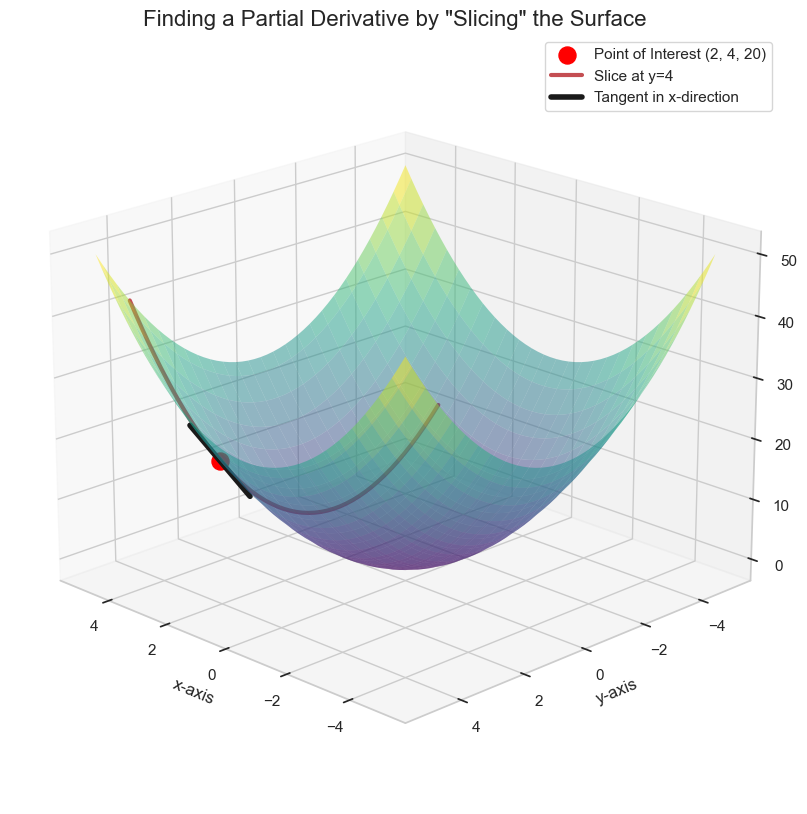

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define the 3D function ---
def f(x, y):
    return x**2 + y**2

# --- Create the data for the 3D surface ---
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# --- Create the 3D plot ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the main surface
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', rstride=2, cstride=2, edgecolor='none')

# --- Our point of interest and slice location ---
y0 = 4
x0 = 2
z0 = f(x0, y0)
ax.scatter(x0, y0, z0, color='red', s=150, label='Point of Interest (2, 4, 20)')

# --- Slice 1: Fix y = 4 ---
x_slice = np.linspace(-5, 5, 50)
z_slice = f(x_slice, y0)
ax.plot(x_slice, np.full_like(x_slice, y0), z_slice, 'r-', linewidth=3, label='Slice at y=4')

# --- Tangent Line in the x-direction ---
# The partial derivative w.r.t x is 2x. At x=2, the slope is 4.
x_tangent = np.linspace(1, 3, 10)
z_tangent = 4 * (x_tangent - x0) + z0
ax.plot(x_tangent, np.full_like(x_tangent, y0), z_tangent, 'k-', linewidth=4, label='Tangent in x-direction')


# --- Format the plot ---
ax.set_title('Finding a Partial Derivative by "Slicing" the Surface', fontsize=16)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis (f(x,y))')
ax.legend()
ax.view_init(elev=20, azim=135)

plt.show()

---

## How to Calculate a Partial Derivative

The process is very simple:

1.  To find the partial derivative with respect to a variable (e.g., `x`), you treat **all other variables** as constants.
2.  Differentiate the function using the normal rules of differentiation.

Let's find the partial derivatives for our function $f(x, y) = x^2 + y^2$.

### Partial Derivative with respect to x ($\frac{\partial f}{\partial x}$)

1.  **Treat `y` as a constant.** This means the term `y²` is also just a constant, like the number 16 in our slicing example.
2.  **Differentiate.** The derivative of a constant is zero.
    $$ \frac{\partial f}{\partial x} = \frac{\partial}{\partial x}(x^2 + y^2) = \frac{\partial}{\partial x}(x^2) + \frac{\partial}{\partial x}(y^2) $$
    $$ = 2x + 0 = 2x $$

### Partial Derivative with respect to y ($\frac{\partial f}{\partial y}$)

1.  **Treat `x` as a constant.**
2.  **Differentiate.**
    $$ \frac{\partial f}{\partial y} = \frac{\partial}{\partial y}(x^2 + y^2) = \frac{\partial}{\partial y}(x^2) + \frac{\partial}{\partial y}(y^2) $$
    $$ = 0 + 2y = 2y $$

---
## Notation

There are two common ways to denote partial derivatives:

* **Leibniz's Notation:** Uses the symbol `∂` (a "curly d").
    * $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$
* **Lagrange's Notation:** Uses a subscript for the variable you are differentiating with respect to.
    * $f_x(x, y)$ and $f_y(x, y)$

If a function has 10 variables, you can take 10 different partial derivatives, one for each variable.

---

## Another Example

To really nail down the concept of a partial derivative, let's work through a more complex example that involves the rules we've learned, like the scalar multiple rule and the power rule.

Let's consider the function:
$$ f(x, y) = 3x^2y^3 $$

The task is to find both partial derivatives: $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$.

### Finding the Partial Derivative with Respect to x ($\frac{\partial f}{\partial x}$)

We will follow our two-step process.

**Step 1: Treat all other variables as constants.**
In this case, we treat the variable `y` as a constant. This means the entire term `y³` is just a constant number. For the purpose of this calculation, we can think of our function as:
$$ f(x, y) = (\text{a constant}) \cdot x^2 \quad \text{where the constant is } 3y^3 $$

**Step 2: Differentiate with respect to x using the normal rules.**
We can now apply the scalar multiple rule and the power rule. The constant term `3y³` just comes along for the ride.
$$ \frac{\partial f}{\partial x} = \frac{\partial}{\partial x}(3y^3 \cdot x^2) $$
$$ = 3y^3 \cdot \frac{\partial}{\partial x}(x^2) $$
$$ = 3y^3 \cdot (2x) $$

Simplifying the expression gives us our final answer:
$$ \frac{\partial f}{\partial x} = 6xy^3 $$

### Finding the Partial Derivative with Respect to y ($\frac{\partial f}{\partial y}$)

The process is exactly the same, but this time we treat `x` as the constant.

**Step 1: Treat all other variables as constants.**
Now, we treat `x` as a constant. This means the term `3x²` is our constant multiplier.

**Step 2: Differentiate with respect to y.**
$$ \frac{\partial f}{\partial y} = \frac{\partial}{\partial y}(3x^2 \cdot y^3) $$
$$ = 3x^2 \cdot \frac{\partial}{\partial y}(y^3) $$
$$ = 3x^2 \cdot (3y^2) $$

Simplifying the expression gives us the second partial derivative:
$$ \frac{\partial f}{\partial y} = 9x^2y^2 $$